In [ ]:
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #默认为'last'
import random
import matplotlib.pyplot as plt
import numpy as np
import time
np.set_printoptions(suppress=True,   precision=20,  threshold=10,  linewidth=40)
pd.set_option('display.float_format',lambda x : '%.3f' % x)

In [55]:
origin=pd.read_csv("../datasets/tpch-1/supplier.csv")
samples=pd.read_csv("../output/torch_cvae_tpch-1-supplier_s_nationkey_ld150_id150_bs256_ep500_rate0.3_binary_gaussian15.csv")
samples=pd.read_csv("./output/torch_cvae_tpch-1-supplier_s_nationkey_ld150_id150_bs256_ep200_rate0.2_binary_gaussian15.csv")
# samples=origin.sample(frac=0.3)
group_col='s_nationkey'
agg_col='s_acctbal'
origin_groups=origin[group_col].value_counts().sort_index()
# origin_groups.plot(kind='bar')
# plt.show()
samples_groups=samples[group_col].value_counts().sort_index()
# samples_groups.plot(kind='bar')
# plt.show()
origin_groups
samples_groups
# samples['rate']=0.3
origin_res=origin.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'))
samples_res=samples.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'),rate=('rate','mean'))
samples_res['agg_sum']=samples_res['agg_sum']/samples_res['rate']
del samples_res['rate']
diff=(samples_res-origin_res).abs()/origin_res
diff.fillna(1, inplace=True)
diff
print("total error:{}".format(diff.values.sum()/diff.size))
origin_res
samples_res

0     420
1     413
2     397
3     412
4     415
5     380
6     402
7     396
8     415
9     405
10    393
11    438
12    377
13    362
14    376
15    373
16    406
17    421
18    407
19    398
20    411
21    399
22    401
23    390
24    393
Name: s_nationkey, dtype: int64

0     84
1     83
2     79
3     82
4     83
5     76
6     80
7     79
8     83
9     81
10    79
11    88
12    75
13    72
14    75
15    75
16    81
17    84
18    81
19    80
20    82
21    80
22    80
23    78
24    79
Name: s_nationkey, dtype: int64

,agg_sum,age_mean
s_nationkey,,
0,0.037,0.037
1,0.055,0.055
2,0.079,0.079
3,0.052,0.052
4,0.008,0.008
5,0.194,0.194
6,0.060,0.060
7,0.076,0.076
8,0.006,0.006


total error:0.060772036199218976


,agg_sum,age_mean
s_nationkey,,
0,1813079.630,4316.856
1,1814336.100,4393.066
2,1749634.480,4407.140
3,2041622.220,4955.394
4,1805131.050,4349.713
5,1796278.370,4727.048
6,1853385.170,4610.411
7,1698097.020,4288.124
8,1858708.570,4478.816


,agg_sum,age_mean
s_nationkey,,
0,1880671.561,4477.789
1,1914945.047,4636.671
2,1612194.729,4060.944
3,1934538.101,4695.481
4,1790137.844,4313.585
5,1447379.671,3808.894
6,1741763.718,4332.746
7,1827621.841,4615.207
8,1847845.317,4452.639


(array([563., 577., 573., ..., 572.,
        221.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

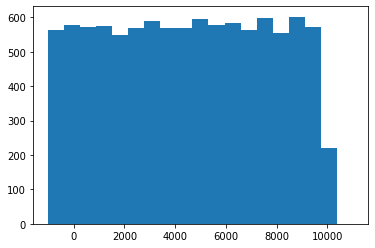

(array([ 67., 117., 106., ..., 115.,
         30.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

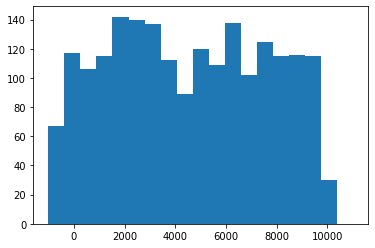

----------------------------------group val:0-------------------------------


(array([20., 25., 25., ..., 22., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

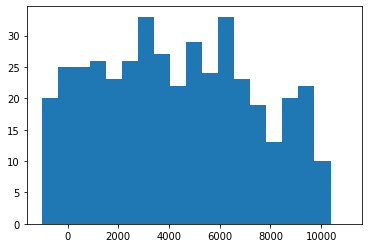

(array([3., 5., 4., ..., 4., 0., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

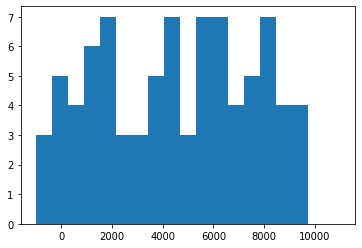

----------------------------------group val:1-------------------------------


(array([22., 34., 16., ..., 27.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

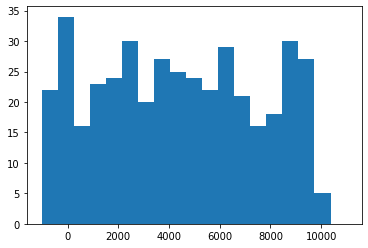

(array([3., 4., 5., ..., 4., 3., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

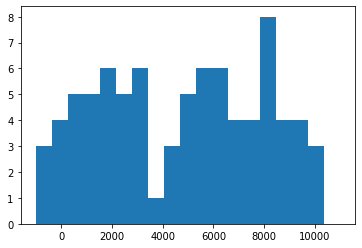

----------------------------------group val:2-------------------------------


(array([24., 20., 19., ..., 20., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

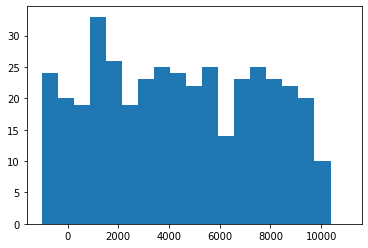

(array([2., 6., 4., ..., 2., 0., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

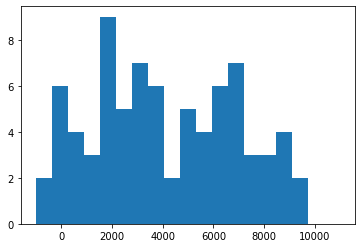

----------------------------------group val:3-------------------------------


(array([16., 16., 23., ..., 29.,  9.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

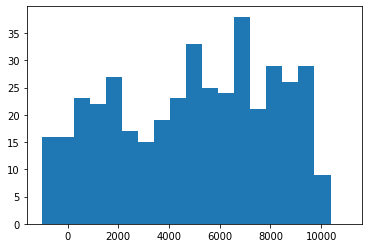

(array([3., 4., 3., ..., 3., 2., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

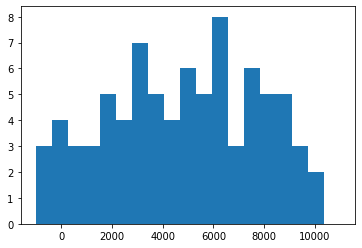

----------------------------------group val:4-------------------------------


(array([20., 18., 40., ..., 22., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

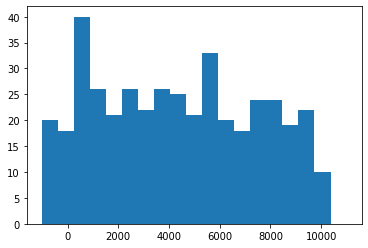

(array([3., 1., 4., ..., 3., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

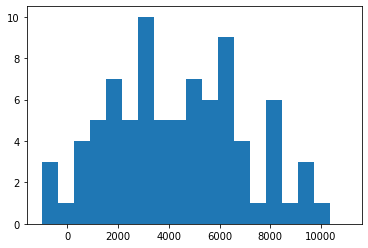

----------------------------------group val:5-------------------------------


(array([24., 19., 14., ..., 25., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

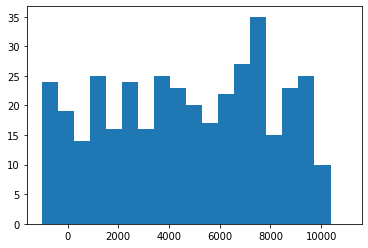

(array([6., 4., 3., ..., 1., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

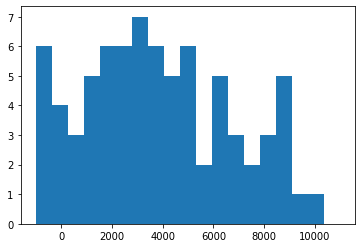

----------------------------------group val:6-------------------------------


(array([20., 22., 28., ..., 22., 11.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

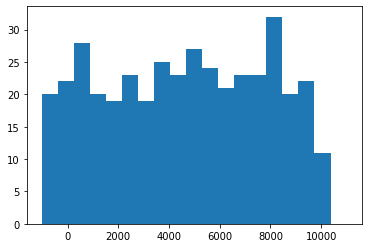

(array([2., 7., 5., ..., 3., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

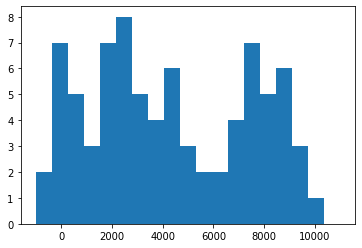

----------------------------------group val:7-------------------------------


(array([30., 25., 24., ..., 16., 11.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

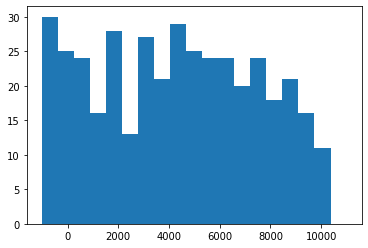

(array([2., 6., 2., ..., 4., 2., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

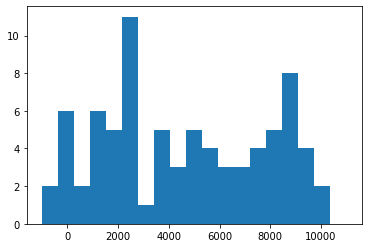

----------------------------------group val:8-------------------------------


(array([26., 23., 25., ..., 31., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

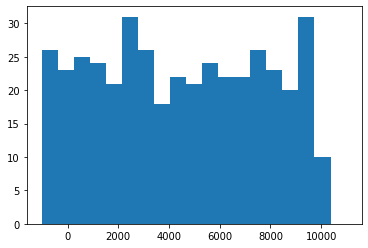

(array([2., 2., 5., ..., 3., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

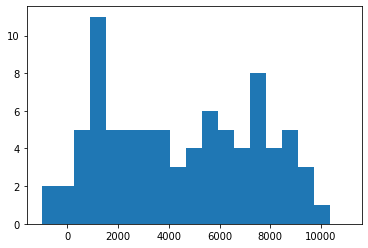

----------------------------------group val:9-------------------------------


(array([20., 21., 21., ..., 23., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

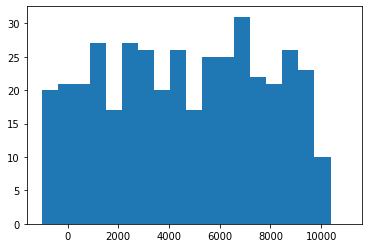

(array([3., 4., 5., ..., 8., 0., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

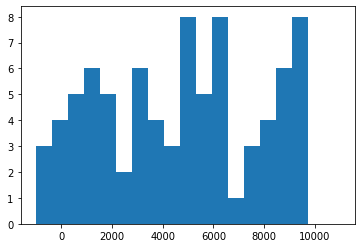

----------------------------------group val:10-------------------------------


(array([22., 28., 21., ..., 13., 12.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

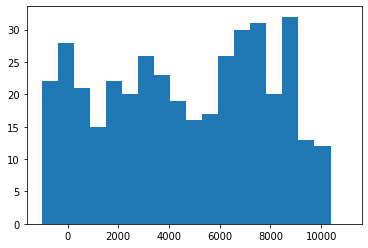

(array([1., 6., 3., ..., 7., 2., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

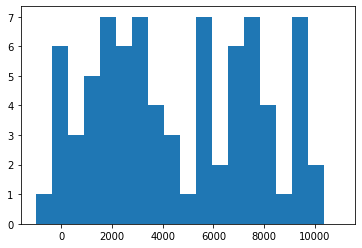

----------------------------------group val:11-------------------------------


(array([16., 24., 28., ..., 13.,  8.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

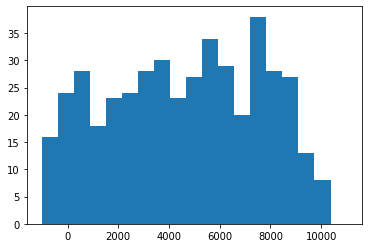

(array([2., 4., 5., ..., 9., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

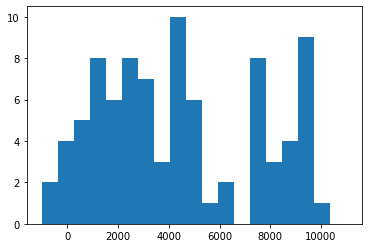

----------------------------------group val:12-------------------------------


(array([24., 23., 18., ..., 33.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

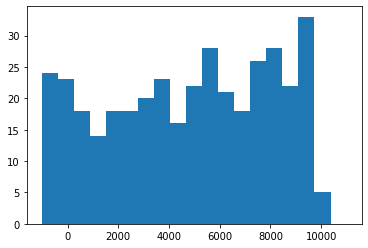

(array([0., 6., 1., ..., 5., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

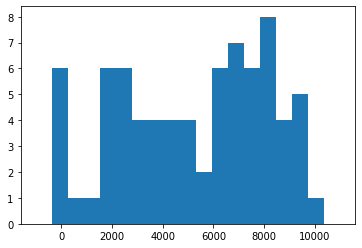

----------------------------------group val:13-------------------------------


(array([27., 19., 23., ..., 19.,  8.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

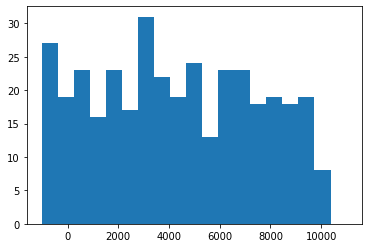

(array([1., 8., 4., ..., 3., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

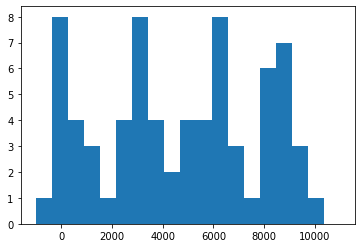

----------------------------------group val:14-------------------------------


(array([18., 28., 15., ..., 22.,  8.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

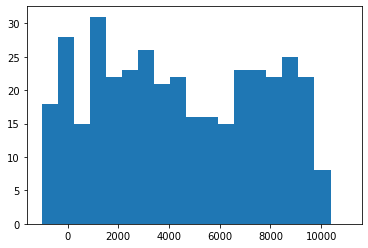

(array([2., 3., 3., ..., 4., 0., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

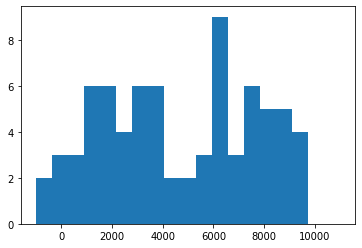

----------------------------------group val:15-------------------------------


(array([20., 23., 22., ..., 30., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

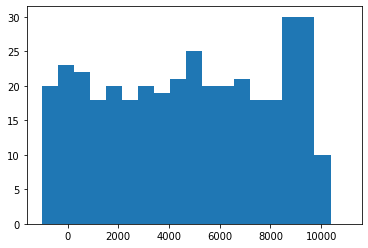

(array([2., 8., 2., ..., 5., 2., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

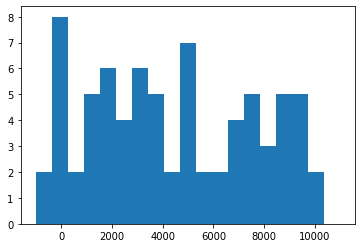

----------------------------------group val:16-------------------------------


(array([31., 28., 21., ..., 16.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

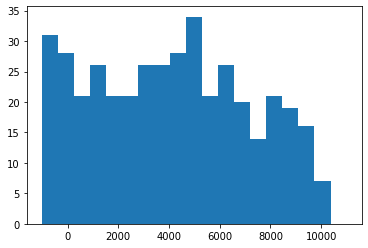

(array([7., 2., 6., ..., 8., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

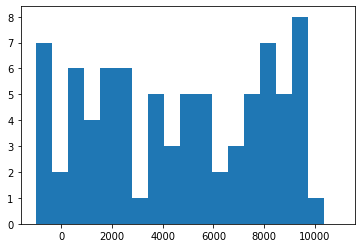

----------------------------------group val:17-------------------------------


(array([25., 24., 28., ..., 33.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

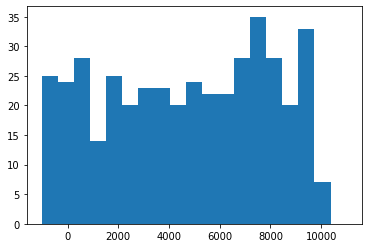

(array([5., 5., 7., ..., 7., 2., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

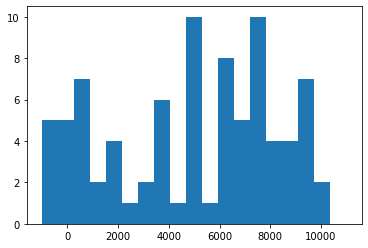

----------------------------------group val:18-------------------------------


(array([28., 30., 25., ..., 22.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

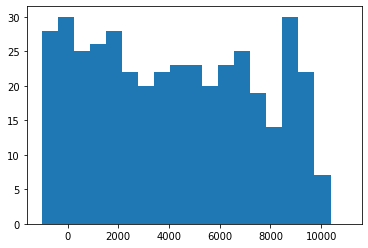

(array([2., 8., 6., ..., 3., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

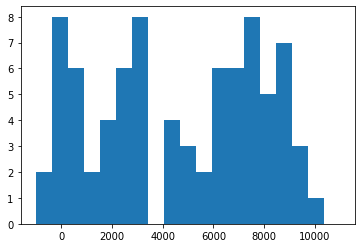

----------------------------------group val:19-------------------------------


(array([17., 23., 28., ..., 23., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

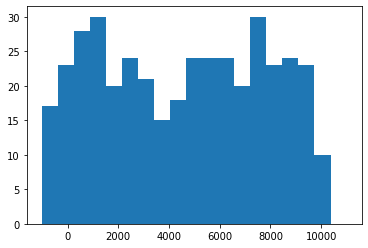

(array([ 4.,  3., 10., ...,  7.,  0.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

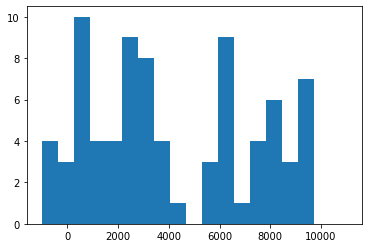

----------------------------------group val:20-------------------------------


(array([19., 24., 35., ..., 16.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

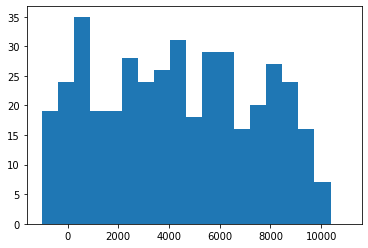

(array([3., 3., 3., ..., 5., 3., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

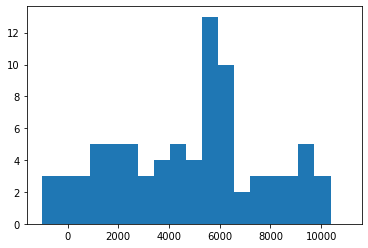

----------------------------------group val:21-------------------------------


(array([25., 25., 22., ..., 25.,  6.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

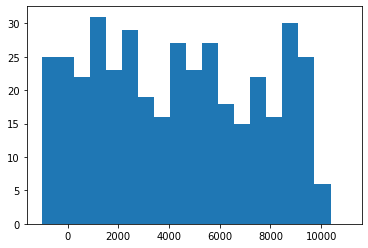

(array([2., 4., 5., ..., 2., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

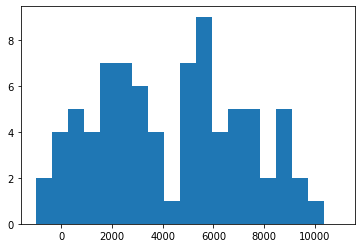

----------------------------------group val:22-------------------------------


(array([19., 15., 19., ..., 20.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

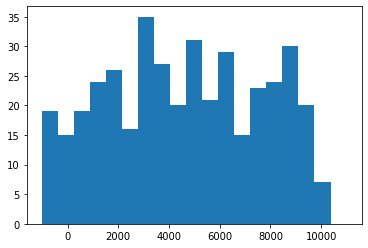

(array([3., 7., 2., ..., 4., 0., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

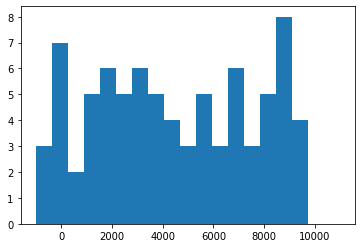

----------------------------------group val:23-------------------------------


(array([29., 18., 18., ..., 20., 13.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

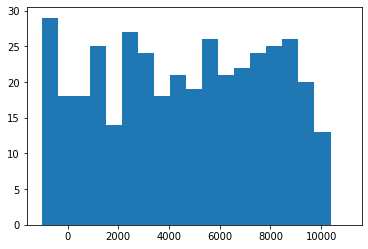

(array([1., 3., 7., ..., 7., 3., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

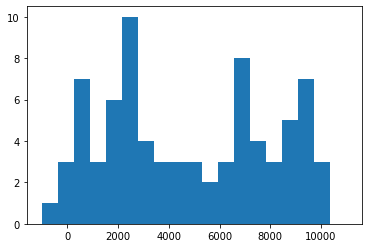

----------------------------------group val:24-------------------------------


(array([21., 22., 15., ..., 30., 10.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

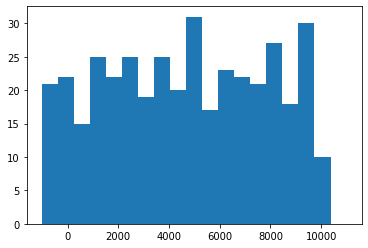

(array([3., 4., 2., ..., 4., 1., 0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

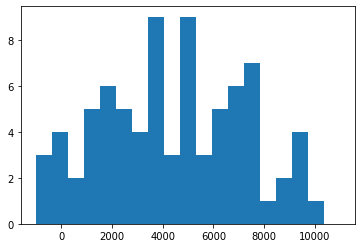

In [56]:
group_vals=origin[group_col].drop_duplicates(keep='first').sort_values()
agg_range=(-1000,11000,24)
bin_num=20
plt.hist(origin[agg_col].values.tolist(),bins)
plt.show()
plt.hist(samples[agg_col].values.tolist(),bins)
plt.show()
for val in group_vals: 
    print('----------------------------------group val:{}-------------------------------'.format(val))
    o_col=origin[origin[group_col]==val][agg_col]
    s_col=samples[samples[group_col]==val][agg_col]
    bins = np.linspace(agg_range[0], agg_range[1], bin_num)
    plt.hist(o_col.values.tolist(),bins)
    plt.show()
    plt.hist(s_col.values.tolist(),bins)
    plt.show()

In [ ]:
group_col="l_returnflag"
agg_col="l4_ul_throughput"
start=time.clock()
origin=pd.read_csv("../datasets/tpch-1/lineitem.csv")
origin_res=origin.groupby(by=group_col).agg({"l_quantity":['sum','mean'],"l_extendedprice":['sum','mean']})
origin_res
end=time.clock()
print('query time:{}'.format(end - start))

In [72]:
origin=pd.read_csv("../datasets/tpch-1/customer.csv")
# samples=pd.read_csv("../output/torch_cvae_tpch-1-customer_c_nationkey_ld150_id150_bs512_ep200_rate0.1_binary_gaussian15.csv")
# samples=pd.read_csv("./output/torch_cvae_tpch-1-customer_c_nationkey_ld150_id150_bs512_ep200_rate0.05_binary_gaussian15.csv")
samples=origin.sample(frac=0.05)
# origin=origin[origin['c_mktsegment']=='HOUSEHOLD']
# samples=samples[samples['c_mktsegment']=='HOUSEHOLD']
group_col='c_nationkey'
agg_col='c_acctbal'
origin_groups=origin[group_col].value_counts().sort_index()
samples_groups=samples[group_col].value_counts().sort_index()
# origin_groups.plot(kind='bar')
# plt.show()
# samples_groups.plot(kind='bar')
# plt.show()
origin_groups
samples_groups
samples['rate']=0.05
# rate=samples_groups/origin_groups
origin_res=origin.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'))
samples_res=samples.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'),rate=('rate','mean'))
# samples_res=samples.groupby(by=group_col, as_index=True).agg({agg_col:['sum','mean'],'rate':'mean'})
# samples_res['rate']=rate
samples_res
samples_res['agg_sum']=samples_res['agg_sum']/samples_res['rate']
samples_res
del samples_res['rate']
diff=(samples_res-origin_res).abs()/origin_res
diff.fillna(1, inplace=True)
diff
print("total error:{}".format(diff.values.sum()/diff.size))
origin_res
samples_res

0     5925
1     5975
2     5999
3     6020
4     5995
5     5952
6     6100
7     5908
8     6042
9     6161
10    6009
11    5963
12    5948
13    6033
14    5992
15    5921
16    5974
17    5975
18    6024
19    6100
20    5904
21    6008
22    6078
23    6011
24    5983
Name: c_nationkey, dtype: int64

0     294
1     320
2     284
3     308
4     326
5     317
6     298
7     282
8     319
9     302
10    240
11    301
12    317
13    305
14    317
15    301
16    313
17    312
18    284
19    287
20    311
21    285
22    265
23    324
24    288
Name: c_nationkey, dtype: int64

,agg_sum,age_mean,rate
c_nationkey,,,
0,1401858.470,4768.226,0.050
1,1423189.520,4447.467,0.050
2,1337455.750,4709.351,0.050
3,1361933.420,4421.862,0.050
4,1462666.060,4486.706,0.050
5,1372668.790,4330.185,0.050
6,1273299.170,4272.816,0.050
7,1262644.840,4477.464,0.050
8,1351302.640,4236.058,0.050


,agg_sum,age_mean,rate
c_nationkey,,,
0,28037169.400,4768.226,0.050
1,28463790.400,4447.467,0.050
2,26749115.000,4709.351,0.050
3,27238668.400,4421.862,0.050
4,29253321.200,4486.706,0.050
5,27453375.800,4330.185,0.050
6,25465983.400,4272.816,0.050
7,25252896.800,4477.464,0.050
8,27026052.800,4236.058,0.050


,agg_sum,age_mean
c_nationkey,,
0,0.065,0.073
1,0.062,0.008
2,0.003,0.053
3,0.008,0.015
4,0.079,0.007
5,0.032,0.031
6,0.059,0.037
7,0.040,0.006
8,0.010,0.062


total error:0.043970469003970905


,agg_sum,age_mean
c_nationkey,,
0,26322970.100,4442.695
1,26797875.680,4485.000
2,26821675.780,4471.024
3,27025344.160,4489.260
4,27100354.050,4520.493
5,26589805.280,4467.373
6,27059680.480,4436.013
7,26306808.290,4452.743
8,27293627.480,4517.317


,agg_sum,age_mean
c_nationkey,,
0,28037169.400,4768.226
1,28463790.400,4447.467
2,26749115.000,4709.351
3,27238668.400,4421.862
4,29253321.200,4486.706
5,27453375.800,4330.185
6,25465983.400,4272.816
7,25252896.800,4477.464
8,27026052.800,4236.058


-----------------------------group val:15--------------------------


(array([352., 332., 318., ..., 334.,
        148.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

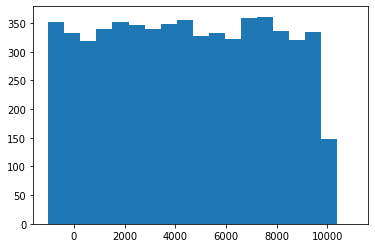

(array([13., 26., 15., ..., 19.,  9.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

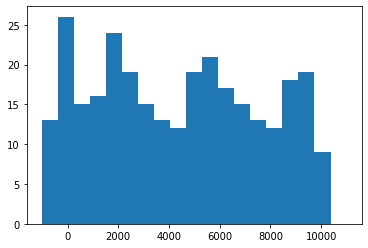

-----------------------------group val:13--------------------------


(array([335., 340., 352., ..., 373.,
        127.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

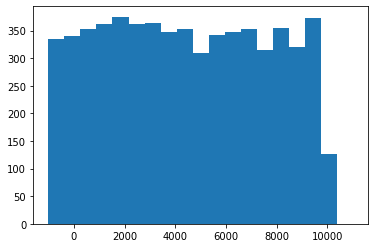

(array([15., 21., 11., ..., 16.,  3.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

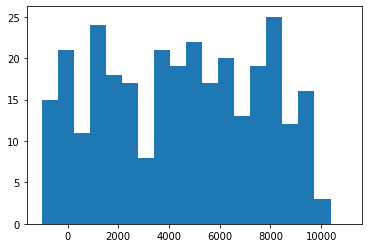

-----------------------------group val:1--------------------------


(array([344., 359., 318., ..., 334.,
        151.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

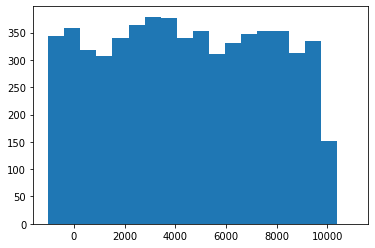

(array([11., 23.,  7., ..., 15.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

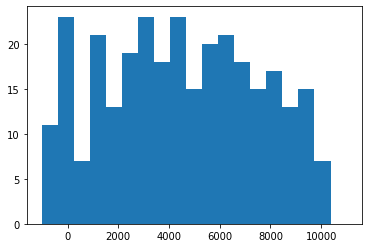

-----------------------------group val:4--------------------------


(array([342., 340., 312., ..., 340.,
        147.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

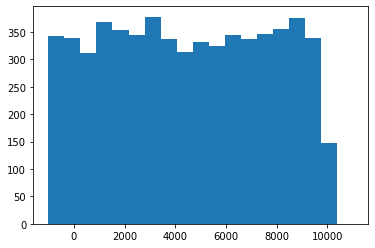

(array([17., 19., 14., ...,  9.,  6.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

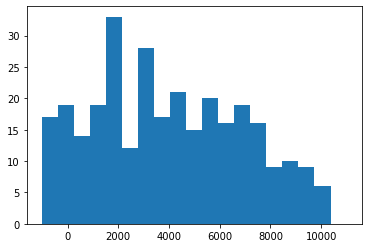

-----------------------------group val:3--------------------------


(array([357., 356., 319., ..., 337.,
        137.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

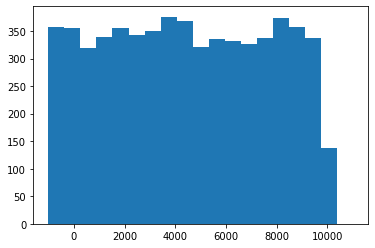

(array([15., 31., 20., ..., 10.,  9.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

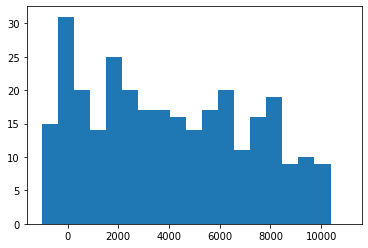

-----------------------------group val:20--------------------------


(array([348., 342., 311., ..., 346.,
        128.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

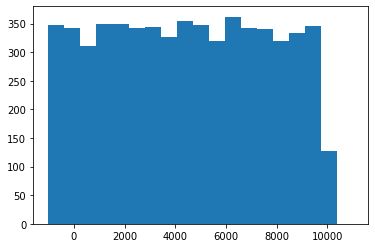

(array([15., 19., 18., ..., 12.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

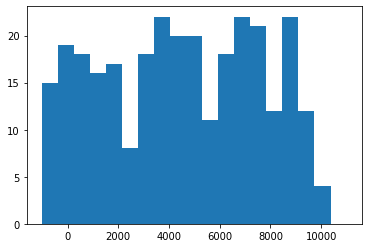

-----------------------------group val:18--------------------------


(array([348., 343., 364., ..., 340.,
        125.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

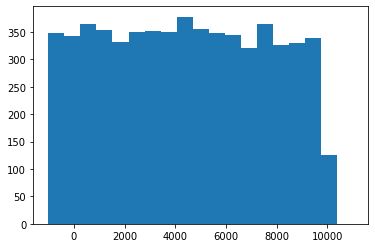

(array([20., 14., 19., ..., 12.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

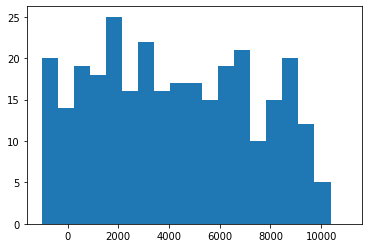

-----------------------------group val:17--------------------------


(array([346., 349., 355., ..., 319.,
        143.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

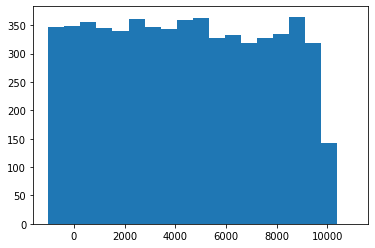

(array([15., 25., 11., ..., 11.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

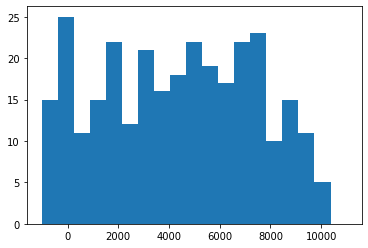

-----------------------------group val:8--------------------------


(array([349., 358., 338., ..., 342.,
        155.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

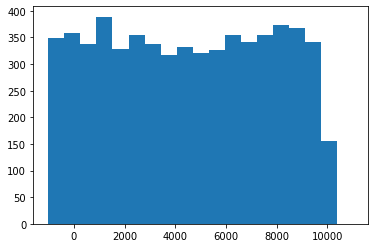

(array([19., 21., 15., ..., 12.,  2.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

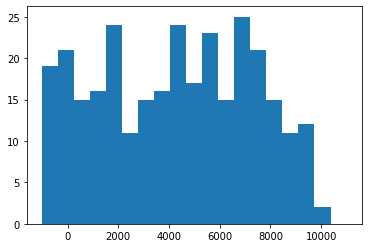

-----------------------------group val:5--------------------------


(array([372., 347., 319., ..., 330.,
        158.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

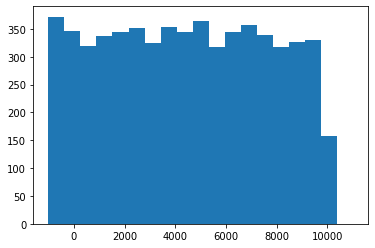

(array([14., 12., 15., ..., 14.,  7.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

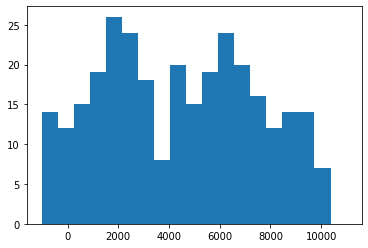

-----------------------------group val:23--------------------------


(array([316., 328., 344., ..., 321.,
        139.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

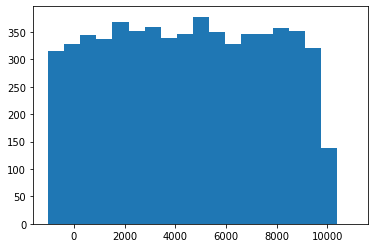

(array([12., 21., 15., ..., 10.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

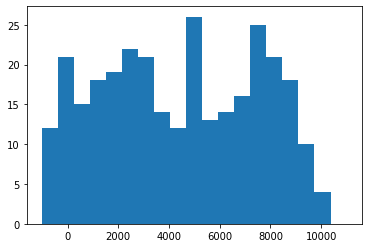

-----------------------------group val:10--------------------------


(array([346., 385., 324., ..., 339.,
        131.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

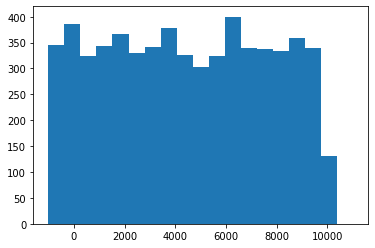

(array([19., 26., 22., ..., 12.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

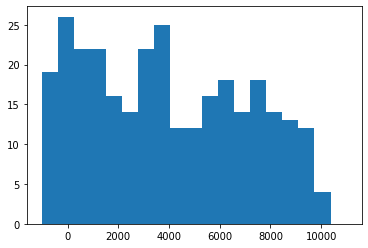

-----------------------------group val:2--------------------------


(array([327., 356., 351., ..., 354.,
        157.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

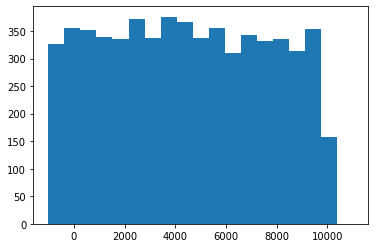

(array([13., 19., 24., ...,  9.,  6.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

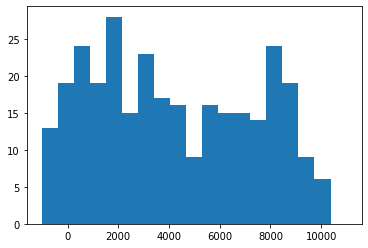

-----------------------------group val:6--------------------------


(array([377., 359., 362., ..., 380.,
        147.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

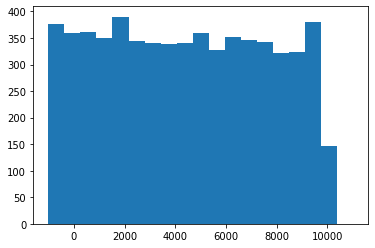

(array([15., 16., 12., ..., 11.,  8.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

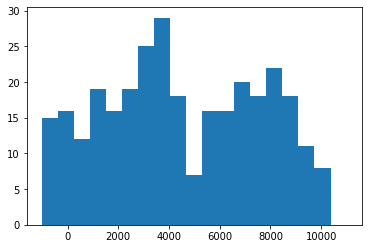

-----------------------------group val:22--------------------------


(array([307., 371., 375., ..., 333.,
        145.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

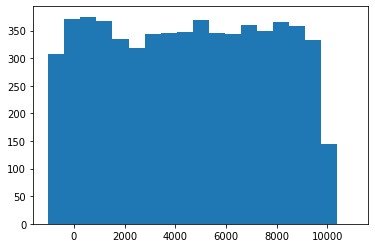

(array([21., 23., 23., ...,  9.,  8.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

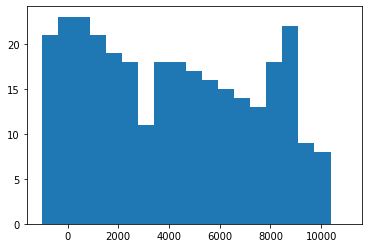

-----------------------------group val:12--------------------------


(array([334., 322., 351., ..., 337.,
        138.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

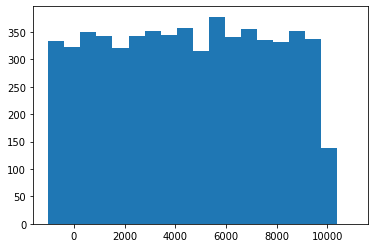

(array([11., 22., 16., ...,  6.,  8.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

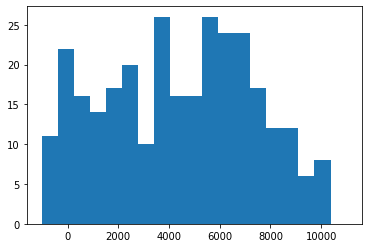

-----------------------------group val:0--------------------------


(array([364., 325., 325., ..., 347.,
        114.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

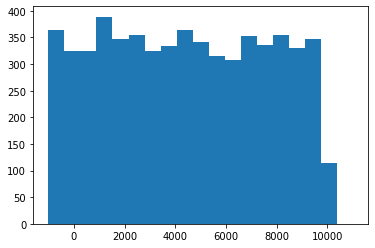

(array([11., 19., 13., ..., 13.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

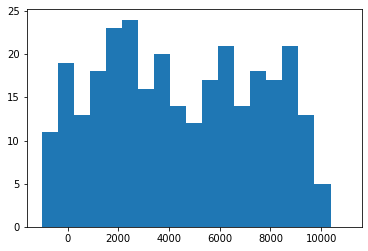

-----------------------------group val:21--------------------------


(array([330., 332., 350., ..., 327.,
        139.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

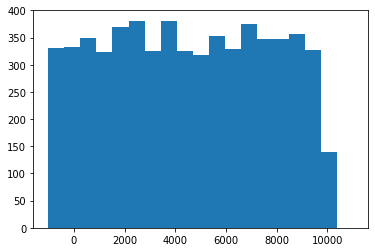

(array([ 8., 15., 21., ...,  9.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

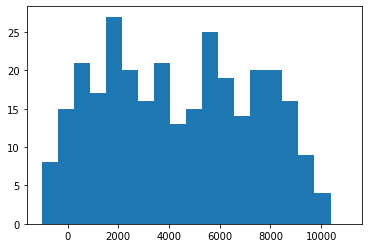

-----------------------------group val:19--------------------------


(array([363., 338., 326., ..., 333.,
        144.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

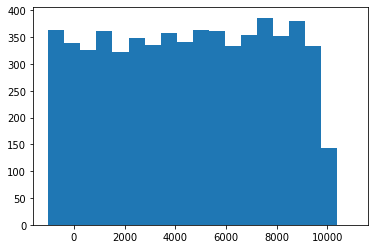

(array([13., 28., 18., ..., 10.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

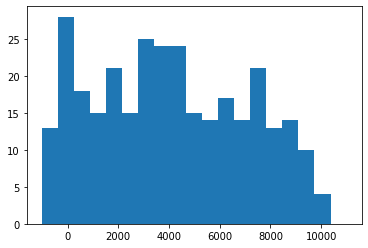

-----------------------------group val:16--------------------------


(array([342., 342., 345., ..., 299.,
        147.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

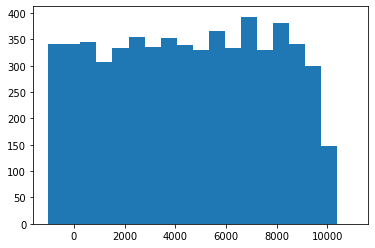

(array([11., 22., 18., ...,  8.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

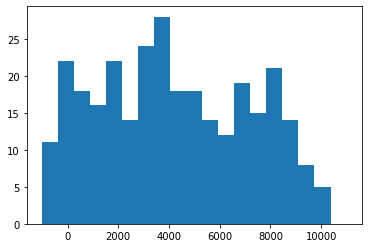

-----------------------------group val:9--------------------------


(array([346., 329., 389., ..., 362.,
        142.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

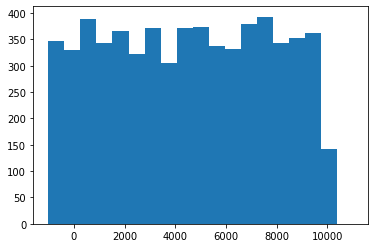

(array([14., 19., 22., ...,  6.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

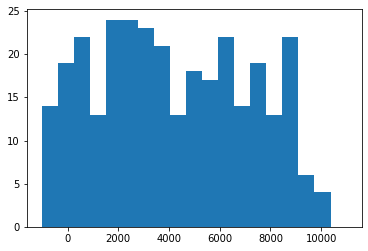

-----------------------------group val:11--------------------------


(array([316., 357., 345., ..., 366.,
        152.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

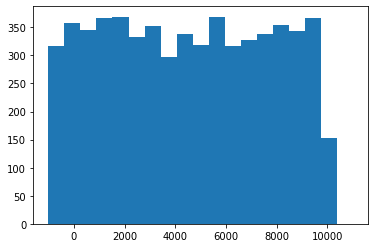

(array([15., 19., 20., ...,  9.,  2.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

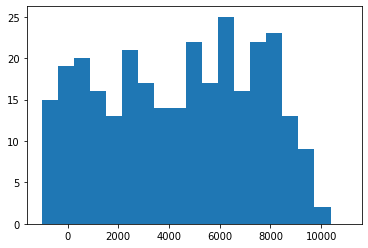

-----------------------------group val:7--------------------------


(array([361., 335., 322., ..., 338.,
        148.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

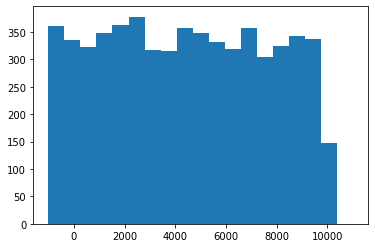

(array([18., 19., 12., ..., 13.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

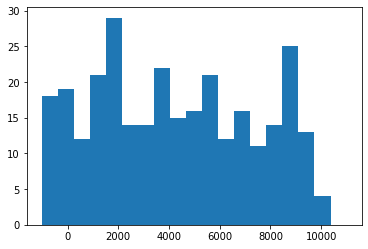

-----------------------------group val:14--------------------------


(array([324., 336., 350., ..., 372.,
        149.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

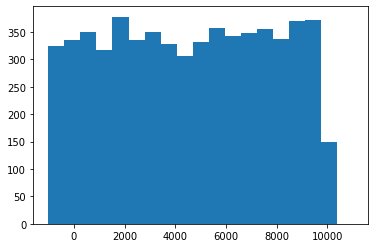

(array([14., 24., 17., ..., 11.,  4.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

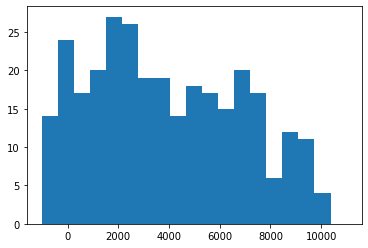

-----------------------------group val:24--------------------------


(array([347., 341., 315., ..., 374.,
        144.,   0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

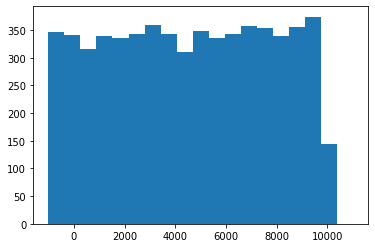

(array([16., 26., 23., ...,  7.,  5.,
         0.]),
 array([-1000.              ,
         -368.42105263157896,
          263.1578947368421 , ...,
         9736.842105263158  ,
        10368.421052631578  ,
        11000.              ]),
 <BarContainer object of 19 artists>)

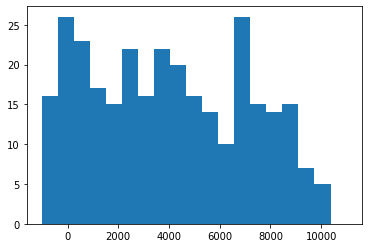

In [58]:
group_vals=origin[group_col].drop_duplicates(keep='first')
agg_range=(-1000,11000)
bin_num=20
bins = np.linspace(agg_range[0], agg_range[1], bin_num)
for val in group_vals: 
    print('-----------------------------group val:{}--------------------------'.format(val))
    o_col=origin[origin[group_col]==val][agg_col]
    s_col=samples[samples[group_col]==val][agg_col]
    plt.hist(o_col.values.tolist(),bins)
    plt.show()
    plt.hist(s_col.values.tolist(),bins)
    plt.show()

In [67]:
# origin=pd.read_csv("../datasets/tpch-1/cs_result.csv")
origin_res=pd.read_csv("../datasets/tpch-1/cs_result.csv")
sample_res=pd.read_csv("./output/cs_result.csv")
# supplier=pd.read_csv("./output/torch_cvae_tpch-1-supplier_s_nationkey_ld150_id150_bs256_ep200_rate0.3_binary_gaussian15.csv")
# customer=pd.read_csv("./output/torch_cvae_tpch-1-customer_c_nationkey_ld150_id150_bs512_ep200_rate0.1_binary_gaussian15.csv")
# samples=pd.read_csv("./output/supplier_customer.csv")
# samples.shape
group_col='c_nationkey'
cagg_col='c_acctbal'
sagg_col='s_acctbal'
# origin_groups=origin[group_col].value_counts().sort_index()
# samples_groups=samples[group_col].value_counts().sort_index()
# origin_groups
# samples_groups
# origin_groups.plot(kind='bar')
# plt.show()
# samples_groups.plot(kind='bar')
# plt.show()
# samples['rate']=0.03
# samples['rate']=samples['rate_x']*samples['rate_y']
# origin_res=origin.groupby(by=group_col).agg(cagg_sum=(cagg_col, 'sum'), cagg_mean=(cagg_col, 'mean'),
#                                             sagg_sum=(sagg_col, 'sum'), sagg_mean=(sagg_col, 'mean'))
# samples_res=samples.groupby(by=group_col).agg(cagg_sum=(cagg_col, 'sum'), cagg_mean=(cagg_col, 'mean'),
#                                                 sagg_sum=(sagg_col, 'sum'), sagg_mean=(sagg_col, 'mean'),rate=('rate','mean'))
# samples_res=samples.groupby(by=group_col, as_index=True).agg({agg_col:['sum','mean'],'rate':'mean'})
# samples_res
# samples_res['cagg_sum'] = samples_res['cagg_sum'] / samples_res['rate']
# samples_res['sagg_sum'] = samples_res['sagg_sum'] / samples_res['rate']
# samples_res
# del samples_res['rate']
diff=(samples_res-origin_res).abs()/origin_res
diff.fillna(1, inplace=True)
diff
print("total error:{}".format(diff.values.sum()/diff.size))
origin_res
samples_res

,cagg_sum,cagg_mean,sagg_sum,sagg_mean
c_nationkey,,,,
0,0.022,0.020,0.053,0.055
1,0.090,0.092,0.100,0.099
2,0.017,0.016,0.031,0.031
3,0.085,0.086,0.137,0.138
4,0.049,0.046,0.011,0.008
5,0.032,0.028,0.087,0.083
6,0.083,0.083,0.024,0.024
7,0.067,0.069,0.111,0.108
8,0.012,0.011,0.035,0.036


total error:0.0537099770976516


,cagg_sum,cagg_mean,sagg_sum,sagg_mean
0,11055647442.001,4442.695,10742496807.745,4316.856
1,11067522655.839,4485.000,10840658197.481,4393.066
2,10648205284.672,4471.024,10496057245.492,4407.140
3,11134441793.912,4489.260,12290565764.390,4955.394
4,11246646930.750,4520.493,10821760644.739,4349.713
5,10104126006.404,4467.373,10691448858.235,4727.048
6,10877991552.953,4436.013,11305649536.977,4610.411
7,10417496082.830,4452.743,10032357194.175,4288.124
8,11326855404.207,4517.317,11230317179.969,4478.816
9,11311845412.513,4533.433,11584936219.811,4642.880


,cagg_sum,cagg_mean,sagg_sum,sagg_mean
c_nationkey,,,,
0,10811134503.465,4355.465,11309365200.335,4556.186
1,10066193271.975,4072.524,11929346122.880,4826.308
2,10467555631.832,4398.133,10816961873.039,4544.942
3,10190111103.412,4102.079,10608423161.144,4270.473
4,10691965322.434,4311.276,10705863333.786,4316.880
5,9782798406.804,4341.350,9765119729.200,4333.505
6,9973452585.601,4067.034,11029349468.474,4497.614
7,9723054510.404,4147.530,11142694556.545,4753.101
8,11192716899.338,4468.507,11620805123.170,4639.414


In [ ]:
origin=pd.read_csv("../datasets/tpch-1-miss/customer_supplier.csv")
group_col='c_nationkey'
agg_col='c_acctbal'
origin_groups=origin[group_col].value_counts().sort_index()
origin_groups
samples_groups
origin_groups.plot(kind='bar')
plt.show()
origin_res=origin.groupby(by=group_col).agg(agg_sum=(agg_col,'sum'),age_mean=(agg_col,'mean'))

In [ ]:
c=pd.read_csv('../datasets/tpch-1/customer.csv')
c.loc[100000:150000,'c_acctbal']=c.loc[100000:150000,'c_acctbal']+4000
oc=c[:100000]
ic1=c[100000:125000]
ic2=c[125000:]
# ic1['c_acctbal']=ic1['c_acctbal'].apply(lambda x: x+4000)
c.to_csv("../datasets/tpch-1/m_customer.csv",index=False)
oc.to_csv("../datasets/tpch-1/m_customer_batch0.csv",index=False)
ic1.to_csv("../datasets/tpch-1/m_customer_batch1.csv",index=False)
ic2.to_csv("../datasets/tpch-1/m_customer_batch2.csv",index=False)
ic1.shape
ic2.shape
agg_range=(-1000,15000)
bin_num=50
bins = np.linspace(agg_range[0], agg_range[1], bin_num)
agg_col='c_acctbal'
group_col='c_nationkey'
group_vals=c[group_col].drop_duplicates(keep='first')
for val in group_vals: 
    print('-----------------------------group val:{}--------------------------'.format(val))
    ch=c[c[group_col]==val][agg_col]
    oh=oc[oc[group_col]==val][agg_col]
    plt.hist(ch.values.tolist(),bins)
    plt.show()
    plt.hist(oh.values.tolist(),bins)
    plt.show()
    ih1=ic1[ic1[group_col]==val][agg_col]
    plt.hist(ih1.values.tolist(),bins)
    plt.show()
# ih2=ic2[agg_col]
# plt.hist(ih2.values.tolist(),bins)
# plt.show()